In [1]:
# Comparing standard rw to special rw without file i/o
#special random walk in this case is an alternating time step with probability bais
import numpy as np
import matplotlib.pyplot as plt
#probability of going to the left
PL = 0.8 
#probability of going to the right
PR = 1.0-PL
# Nr is the # of realiztions 
Nr = 1000 
# timestep starting from 0
Nt = 4000 
#remember to put an extra parenthesis since there are 2 values
x = np.zeros((Nr,2*Nt)) 
for r in range (Nr):
    np.random.seed(r)
    for j in range (Nt):
        rv1 = np.random.uniform(0,1) 
        if rv1 >= PL:
            x[r,2*j] = +1
        elif rv1 < PL:
             x[r,2*j] = -1
        rv2 = np.random.uniform(0,1)
        if rv2 >= PL:
            x[r,2*j+1] = -1
        elif rv2 < PL:
            x[r,2*j+1]= 1
#this is the location
x1 = np.cumsum(x,axis =1) 
# calculating the mean of the location
mean = np.mean(x1,axis=0)
#calculating the varience of location
x1var = np.var(x1, axis=0)
# t is time
t = np.arange(2*Nt)


# Normal or standard random walk model
n_stories = 1000 # of realization
t_compare = 4000 #t_compare is to make it 2*N(t)
t_max = 2*t_compare
# we add one since we started at zero
t = np.arange(t_max)+1
steps=np.zeros((n_stories, t_max))

#Add a loop with index slicing
for i in range(n_stories):
        np.random.seed(i+1)
        tnp_steps= 2 * np.random.randint(0, 1 + 1,  t_max) - 1
        steps[i,:]=tnp_steps[:]
x = np.cumsum(steps, axis=1)
x_mean=np.mean(x, axis=0)
x_var=np.var(x, axis=0)

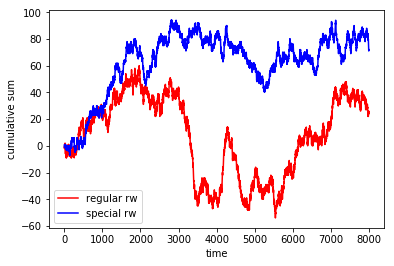

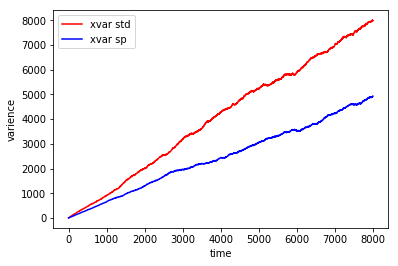

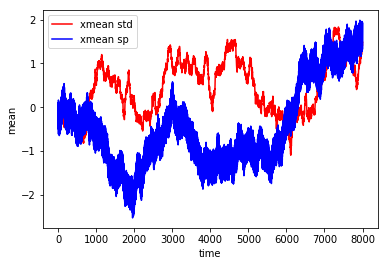

In [24]:
#Generating a plot with special rw(the one with alternating time steps)and regular rw
#Special vs standard under 1 realization
plt.plot(t,x[3,:],'r',label="regular rw")
plt.plot(t,x1[3,:],'b',label="special rw")
plt.xlabel('time')
plt.ylabel('cumulative sum')
plt.legend()
plt.show()

#Special vs standard for varience
plt.plot(t,x_var,'r', label="xvar std")
plt.plot(t,x1var,'b', label="xvar sp")
plt.xlabel('time')
plt.ylabel('varience')
plt.legend()
plt.show()

#Special vs standard for mean
from scipy.signal import savgol_filter
plt.plot(t,x_mean,'r', label= "xmean std")
plt.plot(t,mean,'b', label= "xmean sp")
plt.xlabel('time')
plt.ylabel('mean')
plt.legend()
plt.show()

In [2]:
#Using Machine Learning to calculate accuracy of computer & generating a confusion matrix
import numpy as np
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas
import numpy as np
from sklearn.model_selection import cross_val_score
#we are using logregression as our method of testing the machine's ability to distinguish
logreg = LogisticRegression()
#we want to concatenate the realizations and location 
y1= np.zeros(Nr)
y2 = np.ones(n_stories)
y= np.concatenate((y1,y2),axis =None)
print(y)
c= np.concatenate((x1,x), axis=0)
print(c.shape)

print(x1.shape)

print(x.shape)
X_train, X_test, y_train, y_test = train_test_split(c, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

scores = cross_val_score(logreg, X_train, y_train, scoring='accuracy', cv=10)
print (scores)
print (scores.mean())


[0. 0. 0. ... 1. 1. 1.]
(2000, 8000)
(1000, 8000)
(1000, 8000)
Accuracy of logistic regression classifier on test set: 0.74
[[304   4]
 [149 143]]
[0.73758865 0.74468085 0.72857143 0.70714286 0.72142857 0.74285714
 0.68571429 0.77142857 0.68345324 0.74820144]
0.7271067036947949


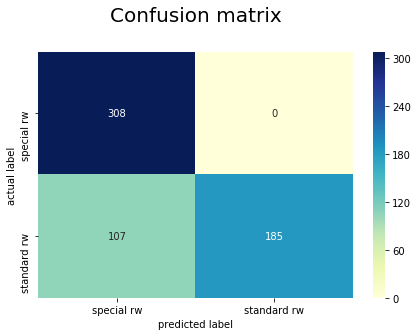

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
fig, ax = plt.subplots()
# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1,fontsize=20)
plt.xlabel('predicted label')
plt.ylabel('actual label')
ax.xaxis.set_ticklabels(['special rw', 'standard rw']); 
ax.yaxis.set_ticklabels(['special rw', 'standard rw']);
plt.show()

In [13]:
#Let's give the computer 10 new sets without any training data to see what the computer gets
import numpy as np
import matplotlib.pyplot as plt
PL = 0.8 #probability of going to the left
PR = 1.0-PL #probability of going to the right
Nr_test = 10 # Nr is the # of realiztions 
Nt_test = 2000 # timestep starting from 0
bignumber = 1000000
x = np.zeros((Nr_test,2*Nt_test)) #remember to put an extra parenthesis since there are 2 values
for r in range(Nr_test):
    np.random.seed(bignumber+r)
    for j in range (Nt):
        rv1 = np.random.uniform(0,1) 
        if rv1 >= PL:
            x[r,2*j] = +1
        elif rv1 < PL:
             x[r,2*j] = -1
        rv2 = np.random.uniform(0,1)
        if rv2 >= PL:
            x[r,2*j+1] = -1
        elif rv2 < PL:
            x[r,2*j+1]= 1
x1 = np.cumsum(x,axis =1) #this is the location
mean = np.mean(x1,axis=0)# calculating the mean of the location
x1var = np.var(x1, axis=0)#calculating the varience of location
t = np.arange(2*Nt) #t is time


# Normal or standard random walk model
n_storiestest = 10  # of realization
t_comparetest = 2000 #t_compare is to make it 2*N(t)
t_max = 2*t_comparetest
# we add one since we started at zero
t = np.arange(t_max)+1

steps=np.zeros((n_storiestest, t_max))

#Add a loop with index slicing
for i in range(n_storiestest):
        np.random.seed(bignumber+i)
        tnp_steps= 2 * np.random.randint(0, 1 + 1,  t_max) - 1
        steps[i,:]=tnp_steps[:]
x = np.cumsum(steps, axis=1)
x_mean=np.mean(x, axis=0)
x_var=np.var(x, axis=0)

#predicting the 10 new sets
import numpy as np
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
c= np.concatenate((x1,x), axis=0)
y_pred = logreg.predict(c)
print(y_pred[0:20])
print(c.shape)
print(x.shape)
print(x1.shape)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1.]
(20, 4000)
(10, 4000)
(10, 4000)


[6.90775528 7.31322039 7.60090246 7.82404601 8.00636757 8.16051825
 8.29404964]
[0.78 0.81 0.8  0.84 0.9  0.91 0.93]


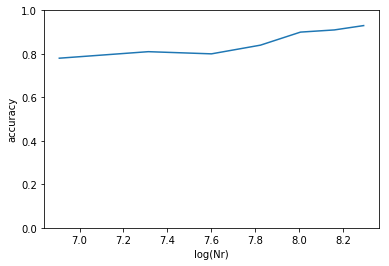

In [8]:
#Generating an accuracy over log(nr)
import matplotlib.pyplot as plt
import numpy as np
x = np.log([1000,1500,2000,2500,3000,3500,4000])
print(x)

y=np.array([0.78,0.81,0.80,0.84,0.90,0.91,0.93])
print(y)
plt.plot(x,y)
plt.ylim(bottom=0,top=1)
plt.xlabel('log(Nr)')
plt.ylabel('accuracy')
plt.show()


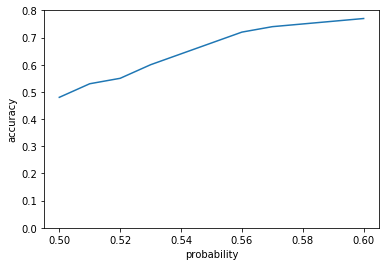

In [7]:
#Generating accuracy versus probability
#knowing that p =0.5 the accuracy is bad we want to know if there is a discounity or a expoential growth
import matplotlib.pyplot as plt
import numpy as np
# y is the accuracy values of 1000 realization and 2000 timesteps
y=np.array([0.48,0.53,0.55, 0.60,0.64,0.68,0.72,0.74,0.75,0.76,0.77])
#x is our probability of going to the left
x=np.array([0.5,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59,0.6])
plt.plot(x,y)
plt.ylim(bottom=0,top=0.8)
plt.xlabel('probability')
plt.ylabel('accuracy')
plt.show()